In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
project_path = 'C:/Users/kunal/MACHINE LEARNING PROJECTS/CREDIT RISK ASSESSMENT'

In [3]:
df_name = 'df_input_lgd.pickle'

In [4]:
df = pd.read_pickle(project_path + '/02_Data/03_Work/' + df_name)

In [5]:
x = df.drop(columns='target_lgd')
y = df.target_lgd.copy()

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': np.arange(0.1,1.1,0.1)},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': np.arange(0.1,1.1,0.1)},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': np.arange(0,1.25,0.25)}
       ]

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 3,
                           n_jobs = -1)

model = grid_search.fit(train_x.values,train_y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [9]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
127,8.941399,0.057968,1.807045,0.011980,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.5,0.1,20,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.262365,-0.265300,-0.263187,-0.263617,0.001236,1
88,7.943850,0.083552,1.766591,0.024305,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.25,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.262876,-0.266568,-0.262490,-0.263978,0.001838,2
196,8.204060,0.298274,1.964789,0.252924,HistGradientBoostingRegressor(min_samples_leaf...,NaN,1.0,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.263958,-0.264864,-0.263232,-0.264018,0.000668,3
52,9.289489,0.123083,1.720272,0.049338,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.0,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.262616,-0.265661,-0.263874,-0.264050,0.001249,4
163,8.008547,0.144295,1.795968,0.056063,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.75,0.1,20,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.262542,-0.266074,-0.263579,-0.264065,0.001482,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.390339,0.105942,0.027600,0.030437,Lasso(),0.5,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.5}",-0.486986,-0.487368,-0.487632,-0.487329,0.000265,191
15,0.332156,0.062902,0.012377,0.003180,Lasso(),0.6,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.6}",-0.486986,-0.487368,-0.487632,-0.487329,0.000265,191
16,0.313368,0.024996,0.020642,0.014049,Lasso(),0.7,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.7...",-0.486986,-0.487368,-0.487632,-0.487329,0.000265,191
18,0.259856,0.035916,0.015547,0.004936,Lasso(),0.9,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.9}",-0.486986,-0.487368,-0.487632,-0.487329,0.000265,191


In [10]:
model.best_estimator_

Pipeline(steps=[('algoritmo',
                 HistGradientBoostingRegressor(l2_regularization=0.5,
                                               max_depth=20, max_iter=200,
                                               min_samples_leaf=100,
                                               scoring='neg_mean_absolute_error'))])

In [11]:
lgbm = HistGradientBoostingRegressor(learning_rate = 0.1,
                                     max_iter = 200,
                                     max_depth = 20,
                                     min_samples_leaf = 100,
                                     scoring = 'neg_mean_absolute_error',
                                     l2_regularization = 0.75)
lgbm.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.75, max_depth=20,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_error')

In [12]:
pred = lgbm.predict(val_x)

In [13]:
print('Max:',pred.max(),'\t Min:',pred.min())

Max: 1.194682014687432 	 Min: -0.1920745348554907


In [14]:
pred = np.clip(pred, a_min=0, a_max=1)

In [15]:
print('Max:',pred.max(),'\t Min:',pred.min())

Max: 1.0 	 Min: 0.0


In [16]:
mean_absolute_error(val_y, pred)

0.2542512064958636

In [17]:
check = pd.DataFrame({'lgd_true':val_y, 'lgd_pred':pred})

In [18]:
check.corr()

,lgd_true,lgd_pred
lgd_true,1.000000,0.719502
lgd_pred,0.719502,1.000000


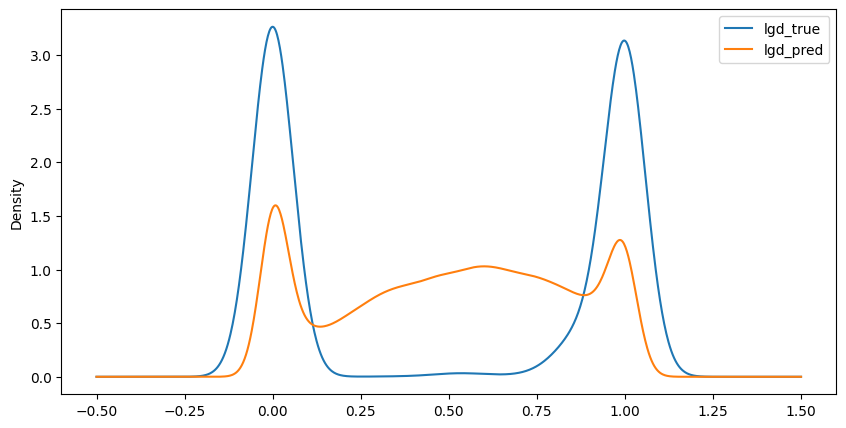

In [19]:
check.plot.density(figsize=(10,5));